# Importing Dataset 
and taking a brief look at the structure

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data=pd.read_excel('C:/Users/jacob/OneDrive/Desktop/STORE/datasets for machine learning/bankLoanModelling/Bank_Personal_Loan_Modelling.xlsx',\
                  sheet_name='Data')
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Following Code is to have a better understanding of the dataset

In [2]:
data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [7]:
data.shape

(5000, 14)

In [4]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [5]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [30]:
data[data['Mortgage']==0].shape[0]

3462

In [31]:
data[data['CCAvg']==0].shape[0]

106

In [34]:
data[data['Securities Account']==0].shape[0]

4478

In [35]:
data[data['CD Account']==0].shape[0]

4698

In [8]:
data.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

# Univariate Analysis
Using Scatter Plot and Distplot to look at the distribution of different features and check for skewness and outliers

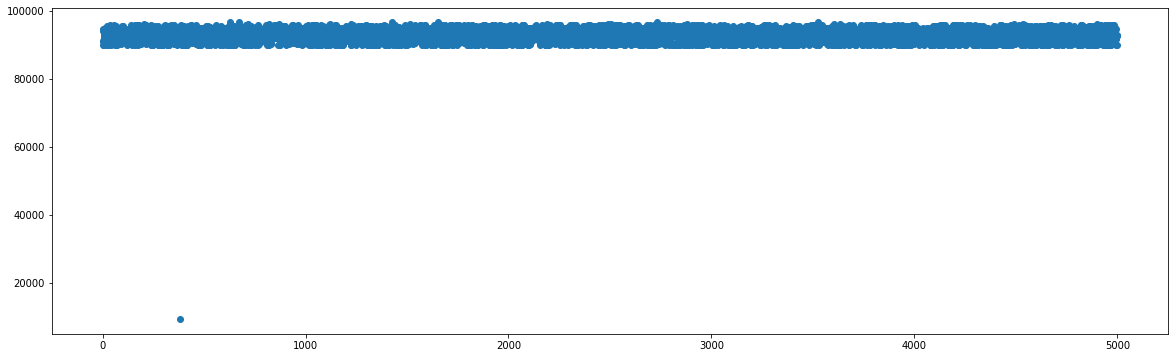

In [13]:
plt.figure(figsize=(20,6))
plt.scatter(data.index,data['ZIP Code'])

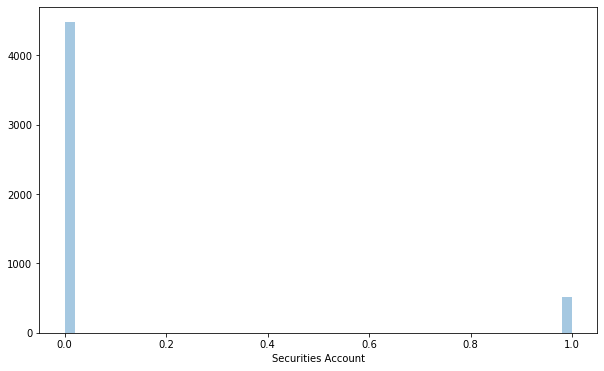

In [27]:
plt.figure(figsize=(10,6))
sns.distplot(data['Securities Account'],rug=False,hist=True,kde=False)

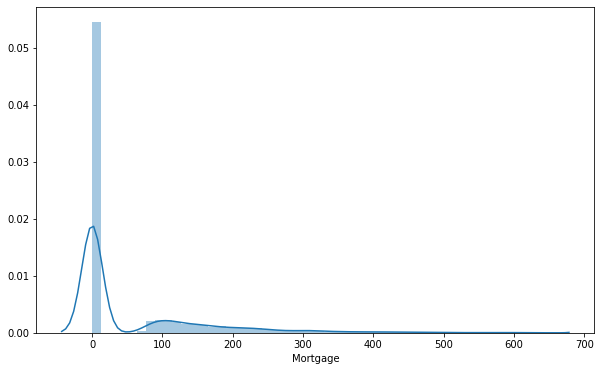

In [14]:
plt.figure(figsize=(10,6))
sns.distplot(data['Mortgage'],rug=False,hist=True)

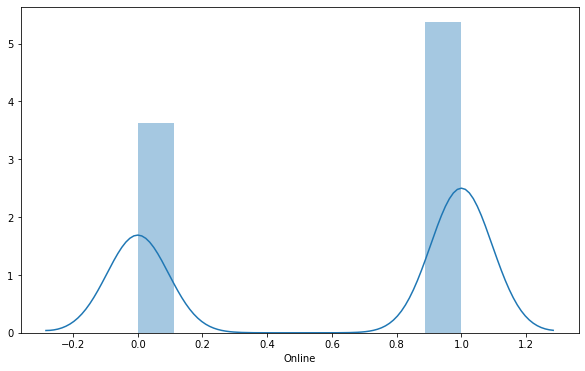

In [15]:
plt.figure(figsize=(10,6))
sns.distplot(data['Online'],rug=False,hist=True)

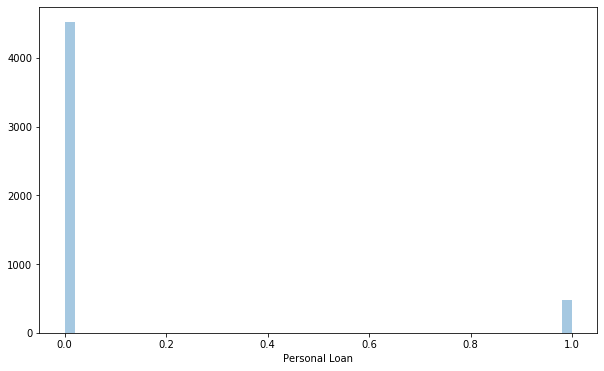

In [18]:
plt.figure(figsize=(10,6))
sns.distplot(data['Personal Loan'],rug=False,hist=True,kde=False)

# Polyvariate Analysis
1. Using Heatmap for correlation checking
2. Bar Chart for relation of categorical features and Target variable
3. KDE Plot to check relation between continous/interval features and Target variable

(14, 0)

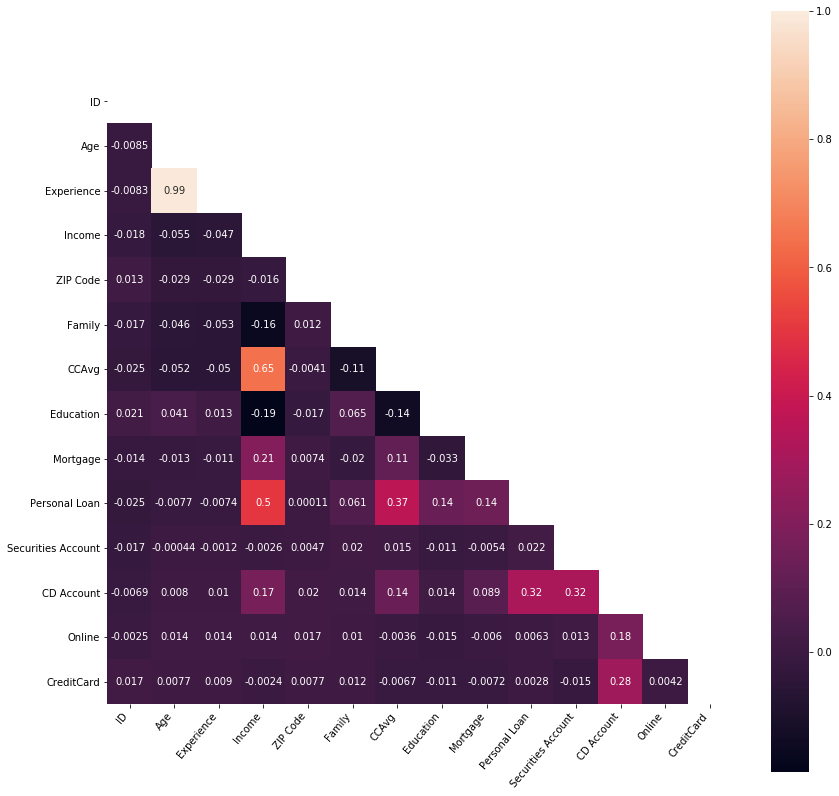

In [19]:
corr=data.corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
plt.figure(figsize=(14,14))
ax=sns.heatmap(
    corr,
    mask=mask,
    square=True,
    annot=True,
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=50,
    horizontalalignment='right'
)
ax.set_ylim([14,0])

Function for Barchart between binary variable and Personal Loan

In [22]:
def bar_chart(feature):
    didnot=data[data['Personal Loan']==0][feature].value_counts()
    did=data[data['Personal Loan']==1][feature].value_counts()
    df=pd.DataFrame([did,didnot])
    df.index=['Did','DidNot']
    df.plot(kind='bar',stacked=True,figsize=(11,6))

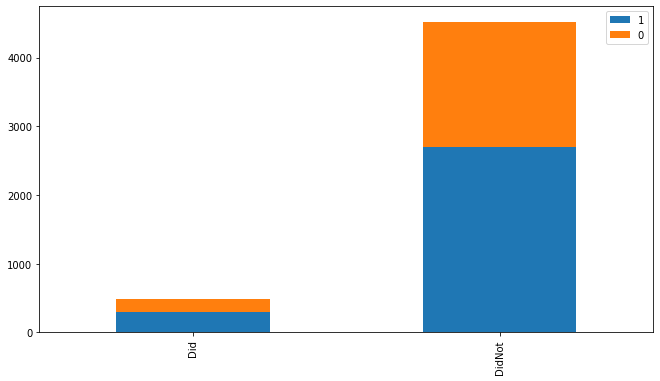

In [23]:
bar_chart('Online')

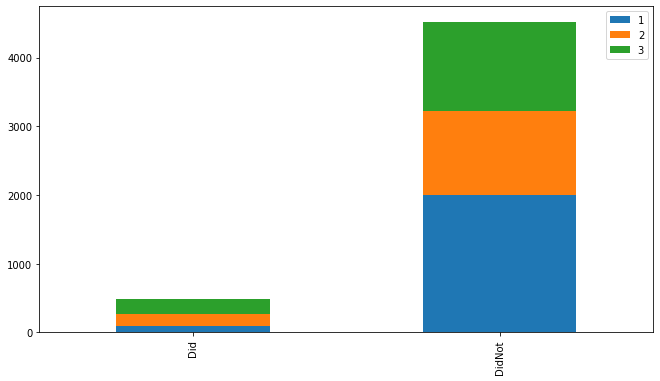

In [24]:
bar_chart('Education')

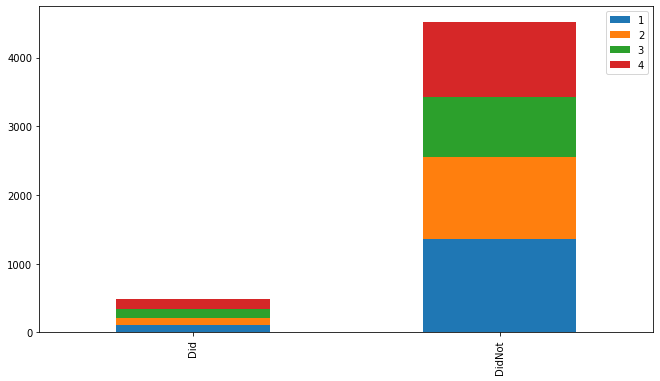

In [38]:
bar_chart('Family')

Function for KDE Plot between continuous/interval variable and Personal Loan

In [53]:
def facet_plot(feature):
    facet=sns.FacetGrid(data,hue='Personal Loan',height=6,aspect=3)
    facet.map(sns.kdeplot,feature,shade=True)
    facet.set(xlim=(data[feature].min(),data[feature].max()))
    facet.add_legend()

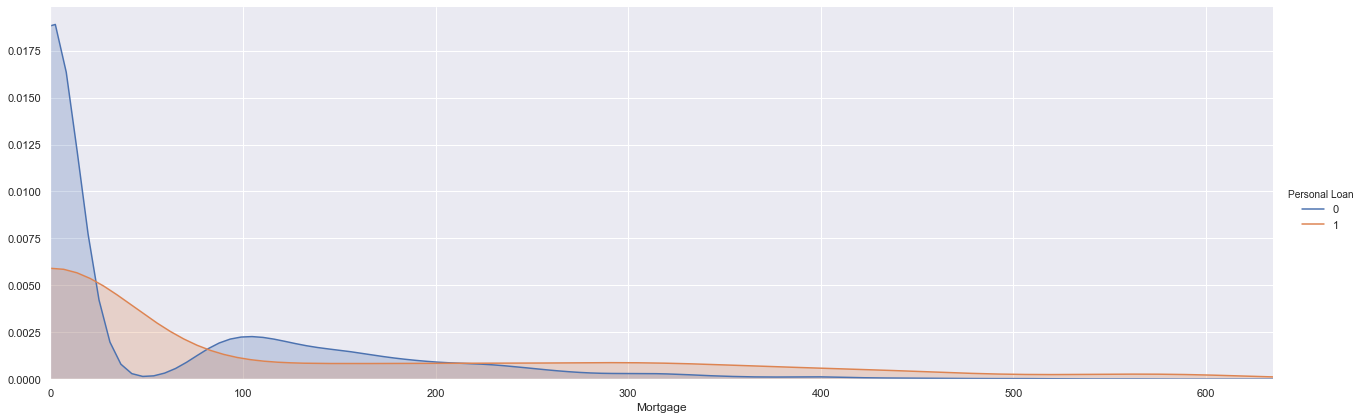

In [54]:
facet_plot('Mortgage')

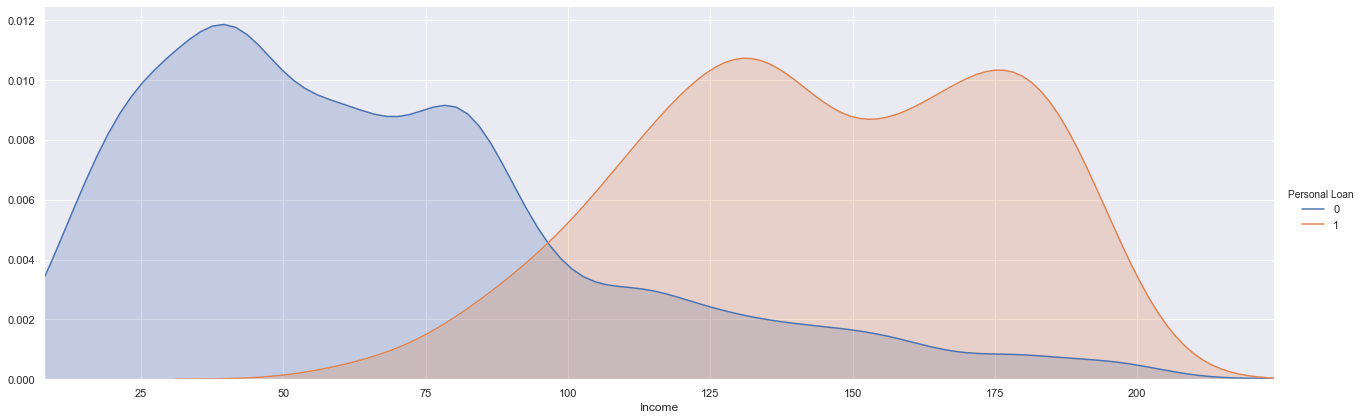

In [55]:
facet_plot('Income')

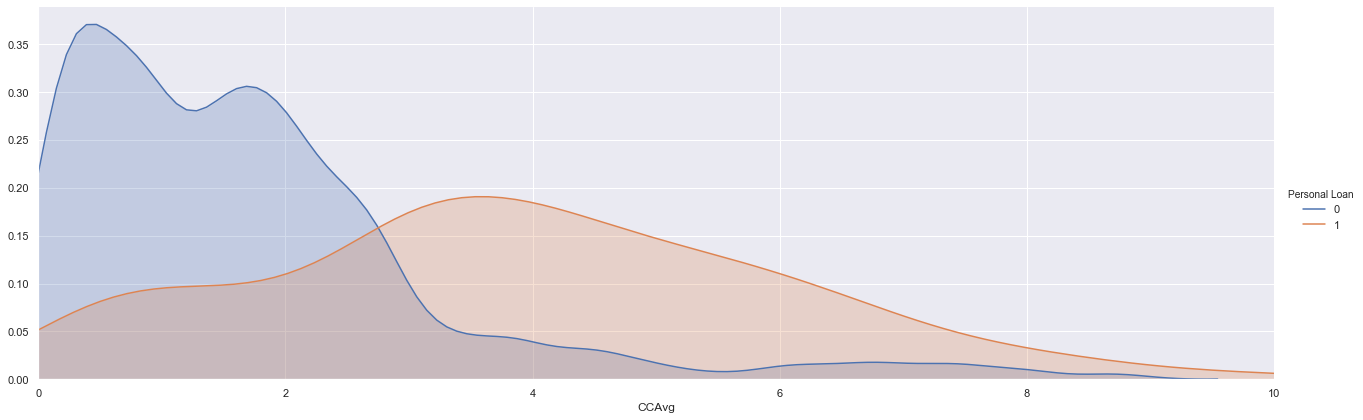

In [56]:
facet_plot('CCAvg')

# Inference from Analysis
1. 89% entries in Securities Account are 0s.
2. 93% entries in CD Account are 0s.
3. Personal Loan (target Variable) is highly skewed, so using f1 score as metric is intuitive.
4. Distribution of Mortgage is skewed as well. Using binning/label encoding will make sense as people who dont have     mortage have higher chance of not taking loan.
5. ZIP Code has a faulty entry, its a 4-digit code instead of 5 (it looks like an oultier on the scatter plot).
6. Experience and Age have really high correlation. Dropping Experience would be better as it has negative values.
7. ID is a randomly generated variable, it should be dropped as well.

# Data Preprocessing

After an decent number of iterations following binning was found to yield the best result

In [58]:
data2=data.copy()
data2.loc[data2['Mortgage']==0,'Mortgage']=0
data2.loc[(data2['Mortgage']>=75)&(data2['Mortgage']<200),'Mortgage']=1
data2.loc[data2['Mortgage']>=200,'Mortgage']=2

Removing outlier/faulty entry from ZIP Code

In [60]:
data2.drop(index=data2.loc[data2['ZIP Code']==9307,'ZIP Code'].index,inplace=True)

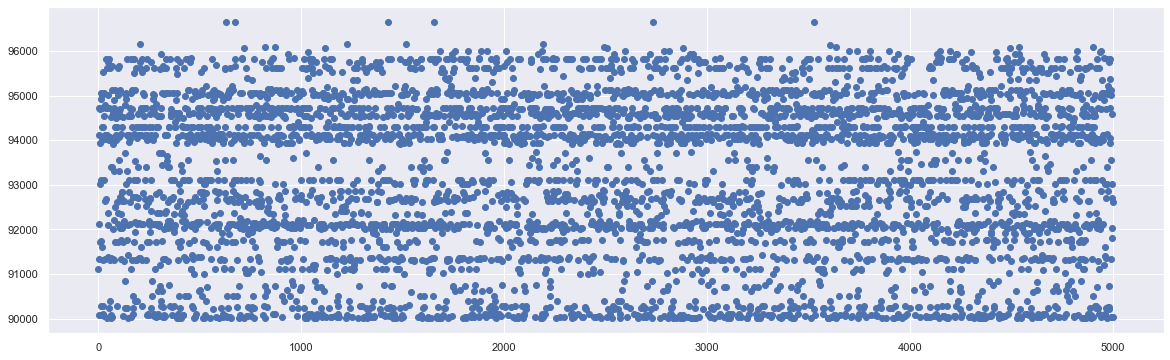

In [116]:
plt.figure(figsize=(20,6))
plt.scatter(data2.index,data2['ZIP Code'])

Dropping columns which are not needed and assigning X and Y

In [63]:
x=data2.loc[:,[x for x in data.columns if not x in ['Personal Loan','ID','Experience']]].values
y=data2.loc[:,'Personal Loan'].values

Normalizing the data

In [64]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x=sc_x.fit_transform(x)

Splitting data into train and test set in ratio of 70:30

In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

# Building Classifier Model

Importing the necessary classifiers and metric methods

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [95]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import accuracy_score,f1_score,make_scorer

In [96]:
k_fold=KFold(n_splits=10,shuffle=True,random_state=0)

Function to calculate accuracy on train_set using cross_validation 

In [101]:
def round_it(x):
    return round(x*100,3)
def calc_score(estimator):
    score=cross_val_score(estimator=estimator,X=x_train,y=y_train,scoring='accuracy',n_jobs=1,cv=k_fold)
    return round_it(score.mean())

Calculating the accuracy of Logistic Regression on Train_set

In [102]:
clf1=LogisticRegression(random_state=0,solver='lbfgs')
calc_score(clf1)

95.341

In [103]:
clf2=KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')
calc_score(clf2)

95.713

In [104]:
clf3=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
calc_score(clf3)

98.028

In [105]:
clf4=XGBClassifier(random_state=0)
calc_score(clf4)

98.514

In [106]:
clf5=SVC(kernel='linear',random_state=0)
calc_score(clf5)

95.541

In [107]:
clf6=DecisionTreeClassifier(criterion='entropy',random_state=0)
calc_score(clf6)

98.114

In [112]:
clf7=GaussianNB()
calc_score(clf7)

89.225

# Prediction Phase

Function to calculate the accuracy and f1_score on test_set

In [80]:
def predict_test(estimator):
    estimator.fit(x_train,y_train)
    y_pred=estimator.predict(x_test)
    print('Accuracy:{0}\nF1_Score:{1}'.format(round_it(accuracy_score(y_test,y_pred)),round_it(f1_score(y_test,y_pred))))

Calculating accuracy and f1_score of Logistic Regression model on test_set

In [108]:
predict_test(clf1)

Accuracy:94.667
F1_Score:68.0


In [109]:
predict_test(clf2)

Accuracy:94.533
F1_Score:62.385


In [83]:
predict_test(clf3)

Accuracy:98.333
F1_Score:90.975


In [84]:
predict_test(clf4)

Accuracy:98.8
F1_Score:93.662


In [110]:
predict_test(clf5)

Accuracy:94.6
F1_Score:64.629


In [111]:
predict_test(clf6)

Accuracy:98.667
F1_Score:93.007


In [113]:
predict_test(clf7)

Accuracy:88.733
F1_Score:46.688


# Conclusion
* The target variable i.e. Personal Loan has a highly skewed distribution. Thus we need to use f1_score as metric to measure how well the model performs.
* Removing 'Securities Account' and 'CD Account' did little to no effect on the f1_score of classifiers because of high skewness.
* Mortgage < 75 = 0  .  Mortgage >=75 and < 200 = 1  .  Mortgage >= 200 =  2 . 75 is chosen because its the next min number after 0. 200 is chosen in accordance to the distribution and KDE plot. People who had 0 Mortgage had really high chance of not taking a Personal Loan.
* Looking at the KDE Plot of 'Income' and 'CCAvg' we can see the clear divide at 96.5 and 2.75 respectively.
* XGB_Classifier proved to be the best classifier with low bias and low inference. It has high accuracy on train and test set and high f1_score on test set.
* Naive Bayes Classifier proved to perform worst.